## Unsupervised Hierarchical Clustering Implementation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## First will do feature scaling & convert data from 4d to 2d

In [18]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.shape

(120, 4)

In [19]:
## For converting data from 4d to 2d will apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)  # 4d --> 2d
pca_scaled = pca.fit_transform(X_scaled)
pca_scaled.shape

(120, 2)

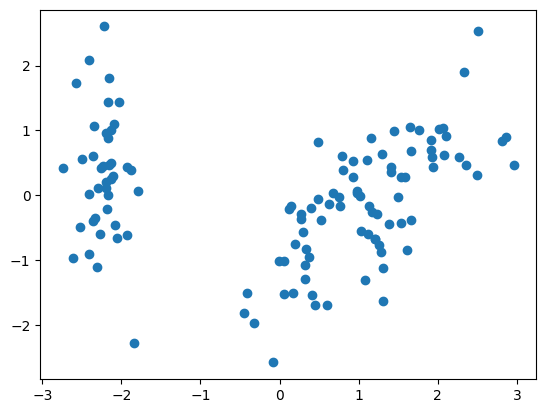

In [20]:
# Visualize
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1])

<function matplotlib.pyplot.show(close=None, block=None)>

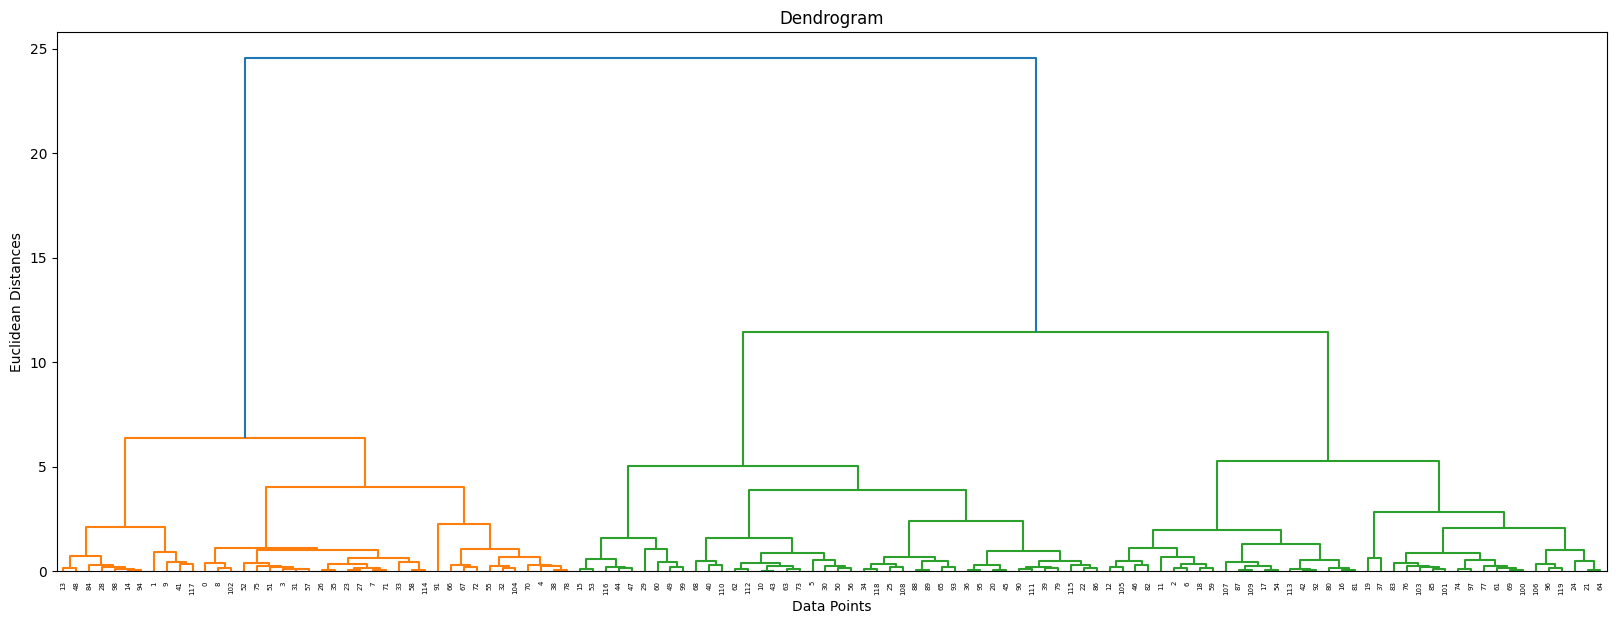

In [24]:
# Construct Dendogram   -> import librs
import scipy.cluster.hierarchy as sc

plt.figure(figsize = (20, 7))
plt.title('Dendrogram')

sc.dendrogram(sc.linkage(pca_scaled, method = 'ward'))  # Fixed line for creating dendograms
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show

## Above graph we can see that longest vertical line having no vertical line passing is available and after drwaing horizontal from it we get <b> K = 2 </b>

In [32]:
## Apply Aglomerative clustering

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit(pca_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean')

In [33]:
y_labels = cluster.labels_
y_labels

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

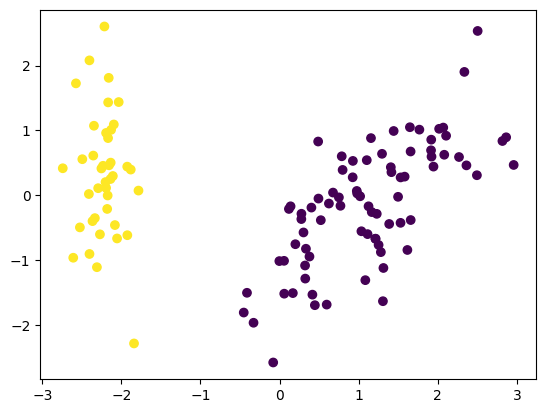

In [34]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c = y_labels)